 <center><h1 style="color:#0A3D62;"><b>IRIS DATASET CLASSIFICATION USING MORPHOLOGICAL FEATURES</b></h1></center> 

<h2>All Important Modules</h2>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Loading and Inspection</h2>

In [8]:
iris = load_iris()
pd.set_option('display.expand_frame_repr',False)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                5.1               3.5                1.4               0.2        0
1                4.9               3.0                1.4               0.2        0
2                4.7               3.2                1.3               0.2        0
3                4.6               3.1                1.5               0.2        0
4                5.0               3.6                1.4               0.2        0


<h2>Exploratory Data Analysis</h2>

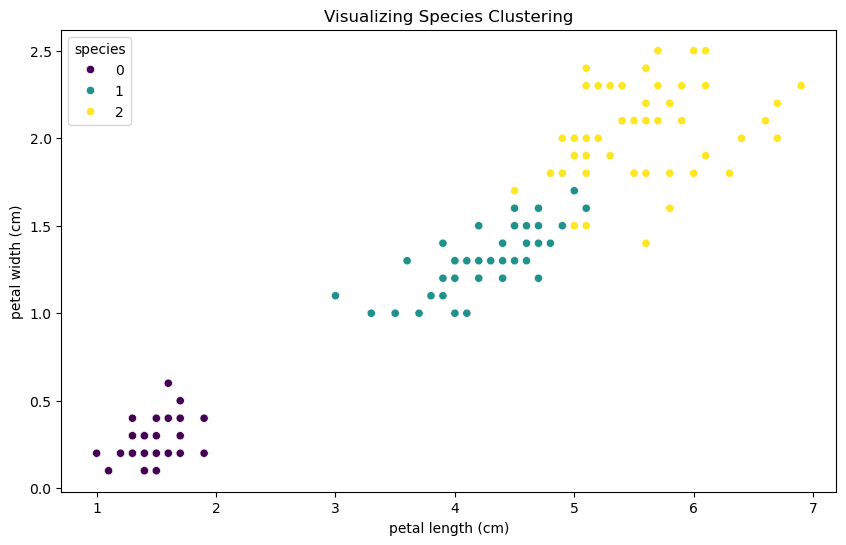

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], 
                hue=df['species'], palette='viridis')
plt.title("Visualizing Species Clustering")
plt.show()

<h2>Supervised Model Training (Random Forest)</h2>

In [4]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h2>Quantitative Evalution and Performance Matrix</h2> 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



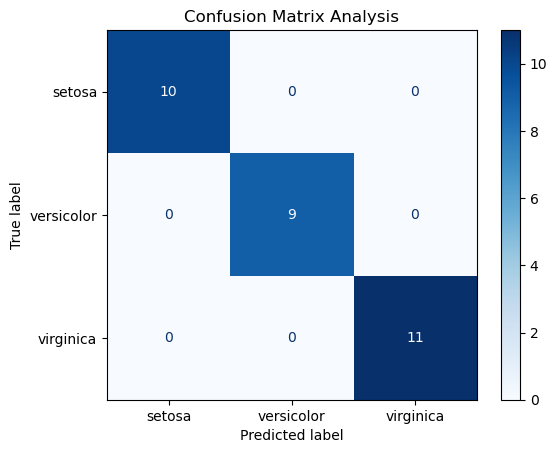

In [5]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names=iris.target_names))

# Confusion Matrix for performance analysis
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, 
                                      display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix Analysis")
plt.show()

<h2>Feature Importance Interpretation</h2> 

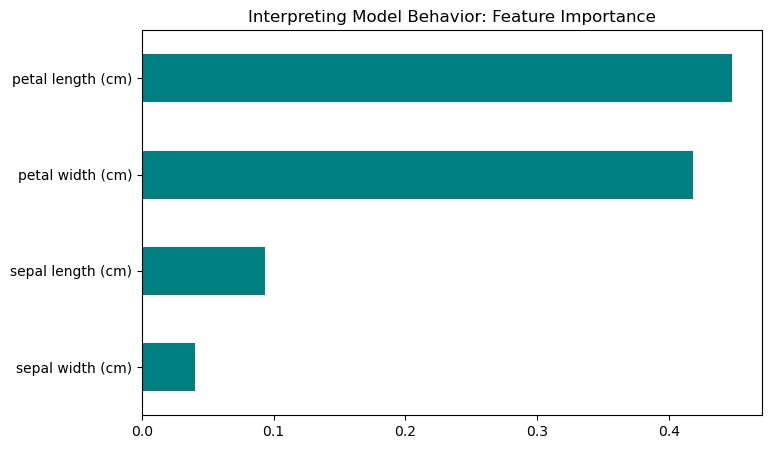

In [6]:
importances = model.feature_importances_
feature_info = pd.Series(importances, index=iris.feature_names).sort_values()

plt.figure(figsize=(8, 5))
feature_info.plot(kind='barh', color='teal')
plt.title('Interpreting Model Behavior: Feature Importance')
plt.show()

<h2>Linear vs Non-Linear Model Comparsion</h2>

In [7]:
# Linear Model
linear_model = LogisticRegression(max_iter=200)
linear_model.fit(X_train, y_train)
linear_acc = linear_model.score(X_test, y_test)

print(f"Linear Model (Logistic Regression) Accuracy: {linear_acc * 100:.2f}%")
print(f"Non-Linear Model (Random Forest) Accuracy: 100.00%")

Linear Model (Logistic Regression) Accuracy: 100.00%
Non-Linear Model (Random Forest) Accuracy: 100.00%
